# Machine Learning Engineer Nanodegree
## Capstone
## Project: Air pressure system failures in Scania trucks

## Libraries Used (Imports)

In [113]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.display import display # Allows the use of display() for DataFrames

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.scorer import make_scorer, accuracy_score, recall_score, roc_auc_score, r2_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

import xgboost as xgb

# Pretty display for notebooks
%matplotlib inline

random_seed = 42

## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

In [2]:
# Load the trianing/Test dataset
try:
    train = pd.read_csv('data/aps_failure_training_set_processed_8bit.csv')
    test = pd.read_csv('data/aps_failure_test_set_processed_8bit.csv')
except:
    print("Dataset could not be loaded. Is the dataset missing?")

In [3]:
# Display a description of the dataset
display(train.shape)
display(test.shape)

(60000, 171)

(16000, 171)

In [4]:
train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,-0.992188,0.117188,-0.289062,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,0.687500,0.515625,0.234375,0.070312,0.007812,-0.109375,-0.140625,-0.171875,-0.023438,-0.023438
1,-0.992188,-0.179688,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,-0.023438,-0.062500,-0.132812,-0.132812,-0.187500,-0.148438,-0.085938,-0.140625,-0.023438,-0.023438
2,-0.992188,-0.125000,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,-0.140625,-0.093750,-0.015625,0.015625,-0.007812,-0.109375,-0.093750,-0.164062,-0.023438,-0.023438
3,-0.992188,-0.406250,-0.289062,-0.468750,-0.007812,-0.046875,-0.007812,-0.007812,-0.03125,-0.054688,...,-0.382812,-0.382812,-0.375000,-0.351562,-0.312500,-0.195312,-0.304688,-0.171875,0.890625,0.992188
4,-0.992188,0.007812,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,0.156250,0.031250,-0.031250,-0.039062,-0.046875,-0.015625,0.656250,-0.148438,-0.023438,-0.023438


In [97]:
train.describe()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.016667,-0.124611,-0.071121,-0.198529,-0.007737,-0.033483,-0.040633,-0.006584,-0.026241,-0.040699,...,-0.104808,-0.098734,-0.094976,-0.089227,-0.103374,-0.088961,-0.084540,-0.067471,-0.020035,-0.018417
std,0.128020,0.367680,0.356812,0.564872,0.004138,0.107086,0.111752,0.032016,0.065200,0.105864,...,0.356547,0.362066,0.363148,0.336121,0.320314,0.237613,0.363893,0.261009,0.051907,0.061751
min,0.000000,-0.406250,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.031250,-0.054688,...,-0.382812,-0.382812,-0.382812,-0.351562,-0.312500,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438
25%,0.000000,-0.398438,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.031250,-0.054688,...,-0.382812,-0.382812,-0.375000,-0.343750,-0.312500,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438
50%,0.000000,-0.195312,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.031250,-0.054688,...,-0.179688,-0.179688,-0.195312,-0.179688,-0.226562,-0.171875,-0.296875,-0.171875,-0.023438,-0.023438
75%,0.000000,-0.070312,-0.000000,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.031250,-0.054688,...,-0.007812,0.015625,0.015625,0.007812,-0.054688,-0.101562,-0.000000,-0.132812,-0.023438,-0.023438
max,1.000000,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,...,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188


In [5]:
train['class'] = train['class'].apply(lambda x: 0 if x<=0 else 1)
test['class'] = test['class'].apply(lambda x: 0 if x<=0 else 1)

X = train.drop('class', axis=1)
y = train['class']

# use the given test set, instead of creating from the training samples
X_test_given = test.drop('class', axis=1)
y_test_given = test['class']

In [118]:
y.ß()

0    59000
1     1000
Name: class, dtype: int64

The column data range varies by sensors

In [8]:
y_test_given.value_counts()

0    15625
1      375
Name: class, dtype: int64

In [9]:
scaler = MinMaxScaler().fit(X)
X_scaled = scaler.transform(X)

In [10]:
X_test_given_scaled = scaler.transform(X_test_given)

In [106]:
pca = PCA(0.95)
pca.fit(X_scaled)
pca.n_components_
X_reduced_data = pca.transform(X_scaled)
X_reduced_data.shape

(60000, 48)

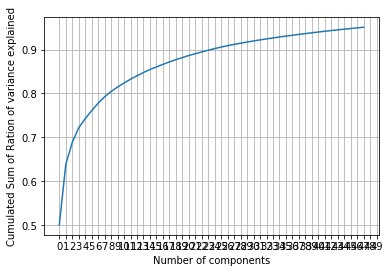

In [107]:
plt.xlabel("Number of components")
plt.ylabel("Cumulated Sum of Ration of variance explained")
plt.xticks(range(0,87))
plt.grid(True)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

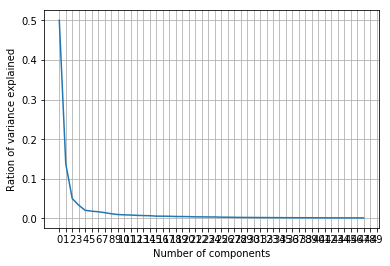

In [108]:
plt.xlabel("Number of components")
plt.ylabel("Ration of variance explained")
plt.xticks(range(0,87))
plt.grid(True)
plt.plot(pca.explained_variance_ratio_)
plt.show()

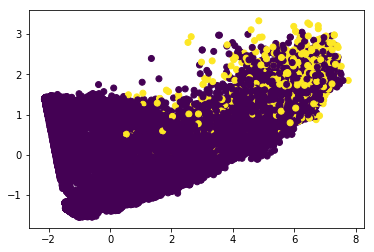

In [109]:
plt.scatter(X_reduced_data[:,0], X_reduced_data[:,1], c=y)
plt.show()

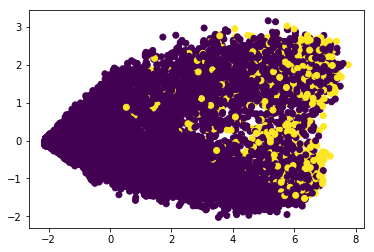

In [17]:
plt.scatter(X_reduced_data[:,0], X_reduced_data[:,2], c=y)
plt.show()

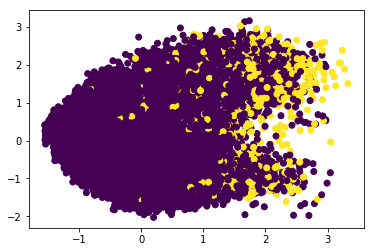

In [18]:
plt.scatter(X_reduced_data[:,1], X_reduced_data[:,2], c=y)
plt.show()

In [6]:
#X_train, X_test, y_train, y_test = train_test_split(reduced_data, y, test_size=0.2, stratify=y, random_state=random_seed)

In [98]:
%%time
predictor = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_delta_step=5,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42, silent=True,
       subsample=0.8, tree_method='hist', verbose=10)
predictor.fit(X_reduced_data, y)

[15:44:58] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
CPU times: user 2min 16s, sys: 1.11 s, total: 2min 17s
Wall time: 2min 19s


In [99]:
predictor.get_params(deep=True)

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 0.8,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_delta_step': 5,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 1000,
 'n_jobs': 1,
 'nthread': 4,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 42,
 'silent': True,
 'subsample': 0.8,
 'tree_method': 'hist',
 'verbose': 10}

In [100]:
from sklearn.metrics import roc_auc_score

score = predictor.predict_proba(X_reduced_data)
print('Best ROC-AUC: {:.4f}'.format(roc_auc_score(y, score[:, 1], average='macro')))

Best ROC-AUC: 1.0000


In [116]:
#predict = predictor.predict(pca.transform(X_test_given_scaled))
print("accuracy score : {}".format(accuracy_score( y_test_given, predict)))
print("recall score : {}".format(recall_score( y_test_given, predict)))
print(classification_report( y_true = y_test_given, y_pred = predict ))
confusion_matrix(y_true = y_test_given, y_pred = predict )

accuracy score : 0.9895
recall score : 0.64
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15625
           1       0.88      0.64      0.74       375

   micro avg       0.99      0.99      0.99     16000
   macro avg       0.94      0.82      0.87     16000
weighted avg       0.99      0.99      0.99     16000



array([[15592,    33],
       [  135,   240]])

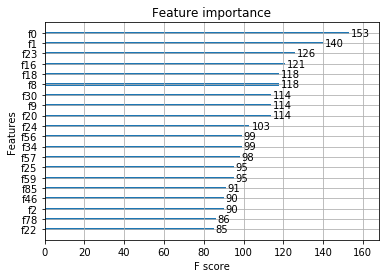

In [102]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(predictor, max_num_features = 20)
pyplot.show()

In [74]:
%%time

params = {
'max_depth':[4,5,6,7],
'learning_rate':[0.1],
'gamma':0.1,0.2, 0.3],
'min_child_weight':[1],
'max_delta_step':[5],
'colsample_bytree':[0.8],
'n_estimators':[1000],
'subsample':[0.8],
'objective':['binary:logistic'],
'nthread':[4],
'scale_pos_weight':[1],
'seed':[random_seed],
'verbose': [10]}

model = xgb.XGBClassifier(tree_method='hist')
cv = GridSearchCV(model, params, cv=5, n_jobs=4, scoring='roc_auc')

cv.fit(X_reduced_data, y)
print(cv.best_estimator_)

[15:04:18] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=3, learning_rate=0.1, max_delta_step=5,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42, silent=True,
       subsample=0.8, tree_method='hist', verbose=10)
CPU times: user 2min 51s, sys: 1.99 s, total: 2min 53s
Wall time: 28min 11s


In [76]:
print(cv.best_estimator_.score(pca.transform(X_test_given_scaled), y_test_given))
print("Best parameters: %s" % cv.best_params_)
print("Best auroc score: %s" % cv.best_score_)

0.9889375
Best parameters: {'colsample_bytree': 0.8, 'gamma': 3, 'learning_rate': 0.1, 'max_delta_step': 5, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 1000, 'nthread': 4, 'objective': 'binary:logistic', 'scale_pos_weight': 1, 'seed': 42, 'subsample': 0.8, 'verbose': 10}
Best auroc score: 0.9902815254237288


In [86]:
predictor = cv.best_estimator_
predictor.save_model('./model/xgb.model')

In [87]:
#predictor_loaded = xgb.XGBClassifier().load_model('./model/xgb.model')

In [88]:
print(predictor_loaded)

None


In [89]:
score = predictor.predict_proba(X_reduced_data)
print('Best ROC-AUC: {:.4f}'.format(roc_auc_score(y, score[:, 1], average='macro')))

Best ROC-AUC: 1.0000


In [90]:
predict = predictor.predict(pca.transform(X_test_given_scaled))
print("accuracy score : {}".format(accuracy_score( y_test_given, predict)))
print(classification_report( y_true = y_test_given, y_pred = predict ))
confusion_matrix(y_true = y_test_given, y_pred = predict )

accuracy score : 0.9889375
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15625
           1       0.88      0.61      0.72       375

   micro avg       0.99      0.99      0.99     16000
   macro avg       0.94      0.80      0.86     16000
weighted avg       0.99      0.99      0.99     16000



array([[15594,    31],
       [  146,   229]])

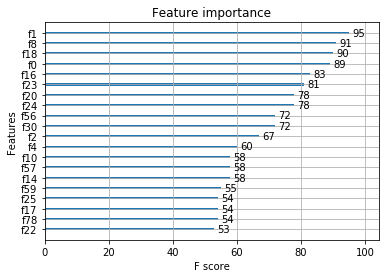

In [91]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(predictor, max_num_features = 20)
pyplot.show()